## Show the outputs of RNN

In [74]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
import ipt
import mxnet as mx
from HeartDeepLearning.CNN.cnn_internal import fetch_internal

###################RNN
perfix = './Result/[ACC-0.22647 E9]'
epoch = 9
from rnn import rnn
from rnn_load import get
net = rnn()
iters = get()
rout,rimg,rll = fetch_internal(net, iters['val'], perfix, epoch, is_rnn=True)

###################ONE CNN
cperfix='../CNN/Result/<1-17:12:45>[E40]/[ACC-0.92900 E39]'
cepoch = 39
from mxnet.io import NDArrayIter
from HeartDeepLearning.CNN.cnn import cnn_net
cnet = cnn_net()
img = iters['val'].data[0][1][:,0].reshape((-1,1,256,256))
label = iters['val'].label[0][1][:,0].reshape((-1,1,256,256))
cval = NDArrayIter(img,label=label, batch_size=2)
cout,cimg,cll = fetch_internal(cnet, cval, cperfix, cepoch)

###################GOOD CNN
gperfix='../CNN/Result/<7-21:57:37>TEST[E30]/[ACC-0.93215 E29]'
gepoch =29
gcout, gcimg, gcll = fetch_internal(cnet, cval, gperfix, gepoch)

Substract Mean
Start Predict
55
Start Predict
Start Predict


(2, 256, 256)
(2, 256, 256)


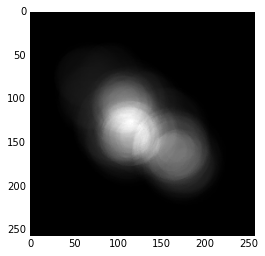

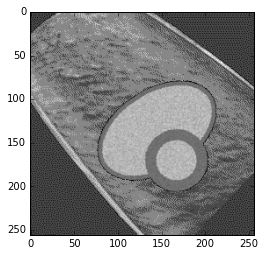

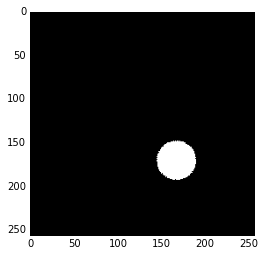

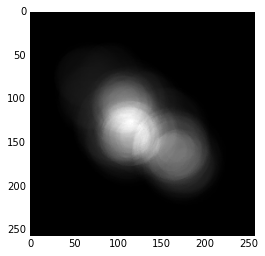

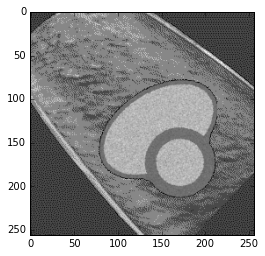

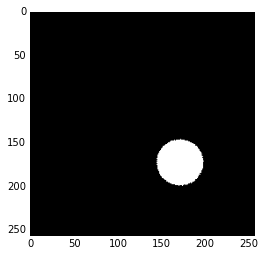

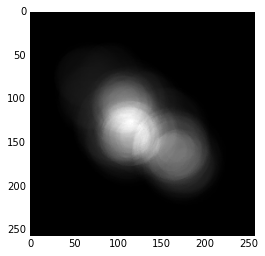

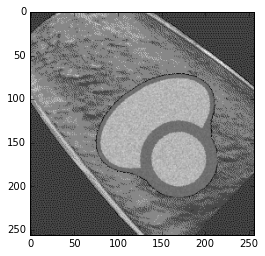

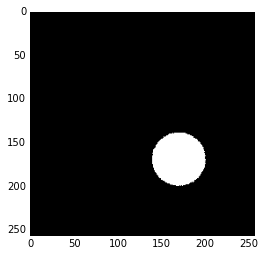

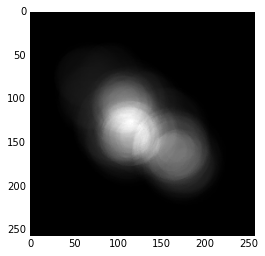

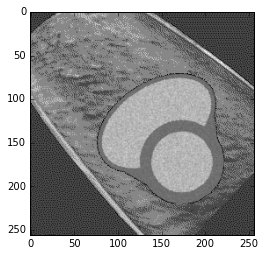

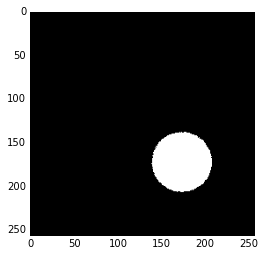

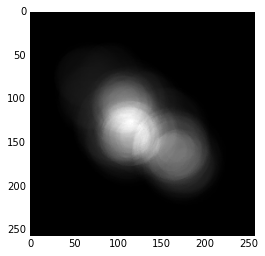

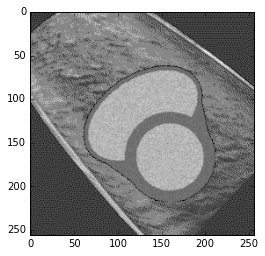

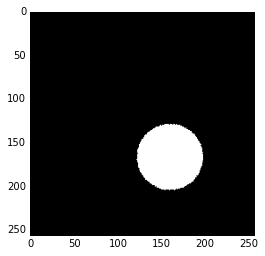

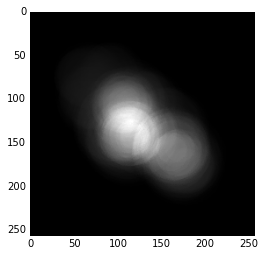

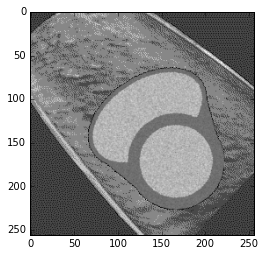

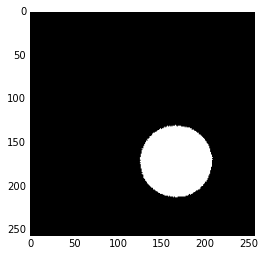

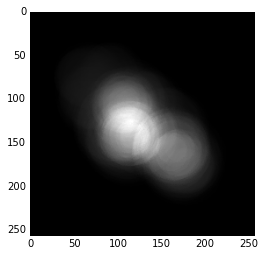

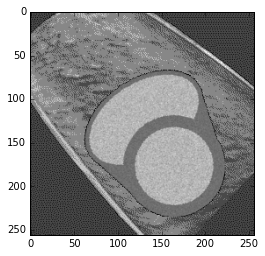

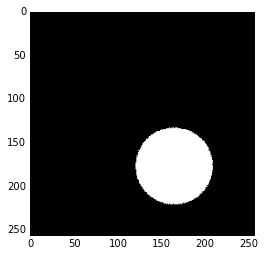

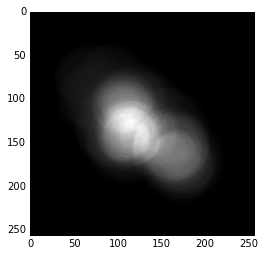

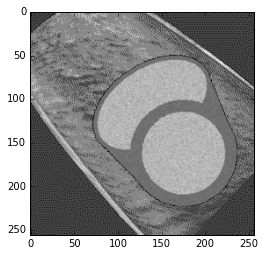

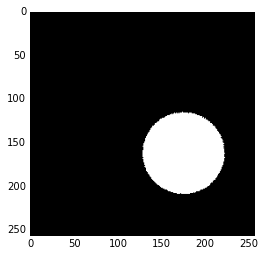

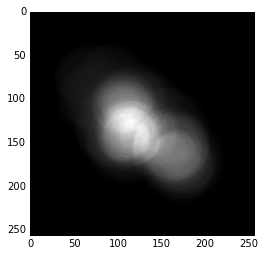

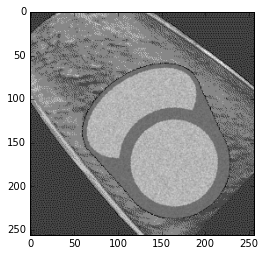

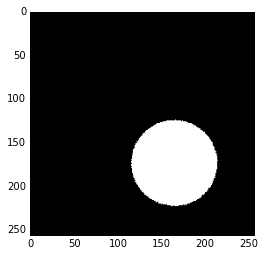

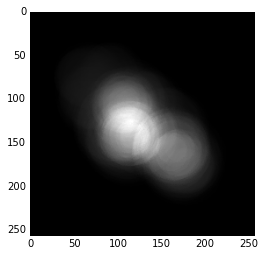

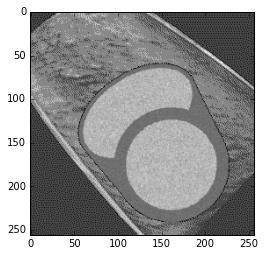

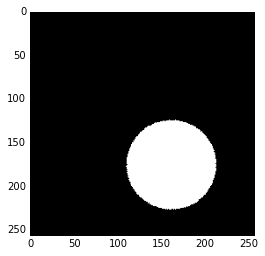

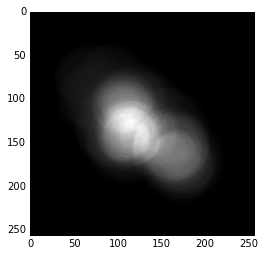

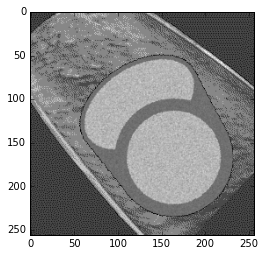

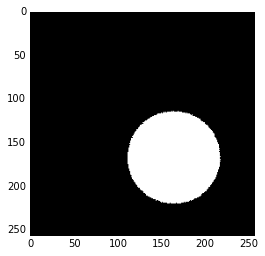

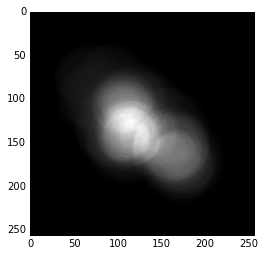

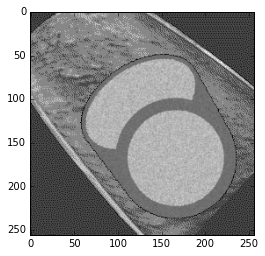

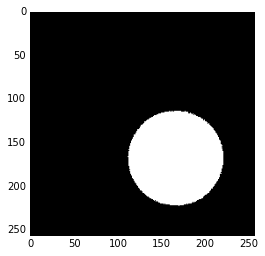

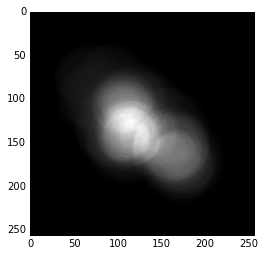

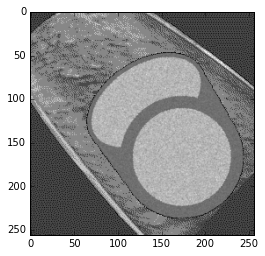

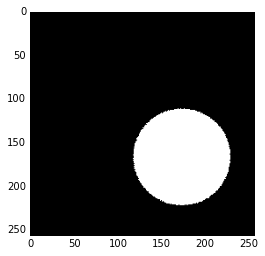

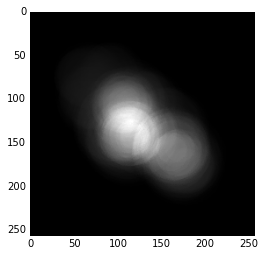

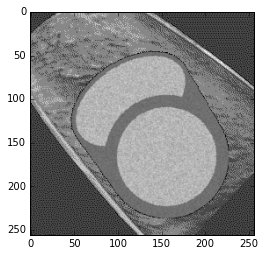

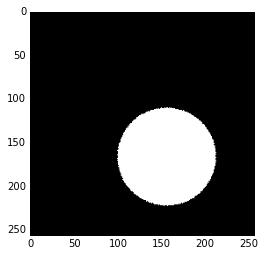

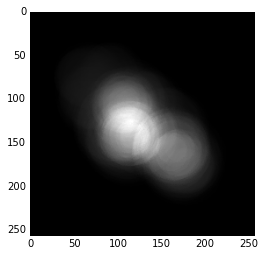

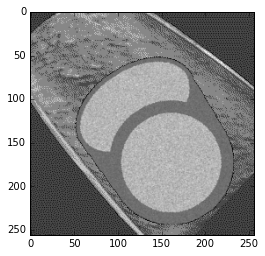

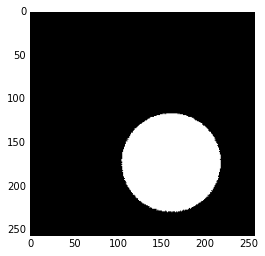

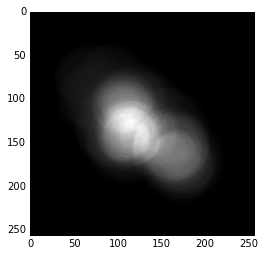

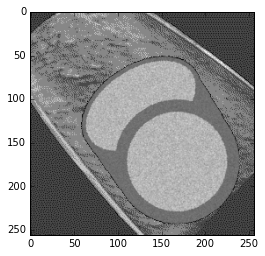

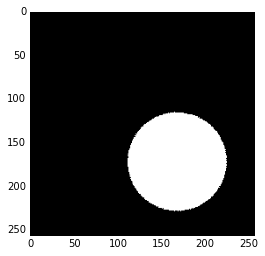

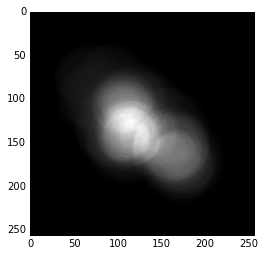

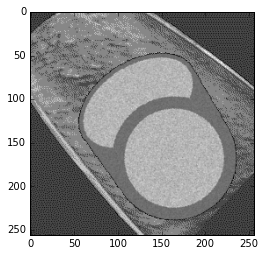

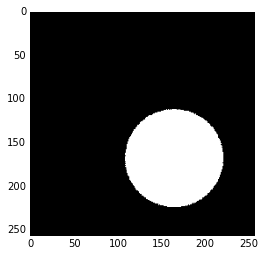

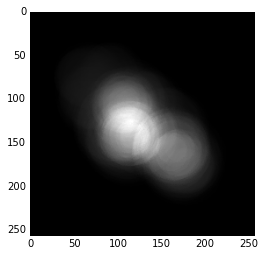

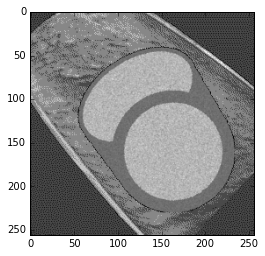

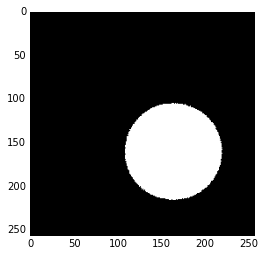

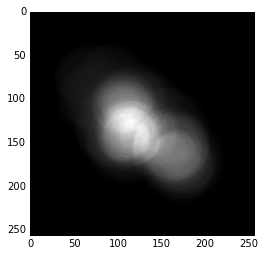

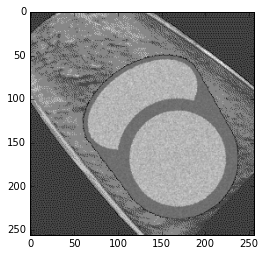

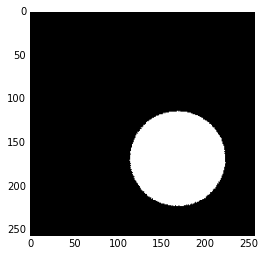

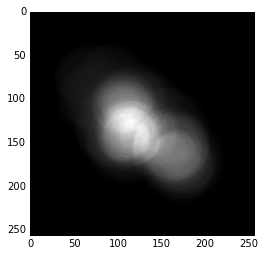

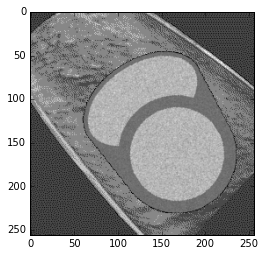

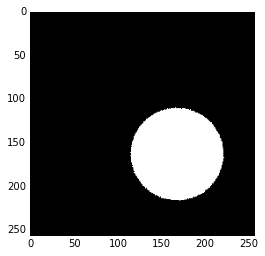

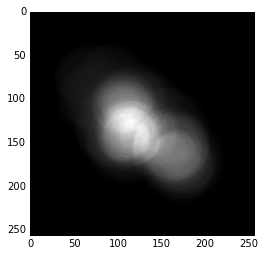

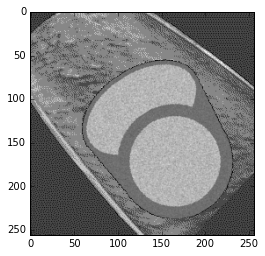

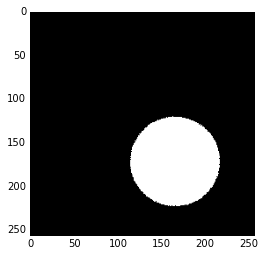

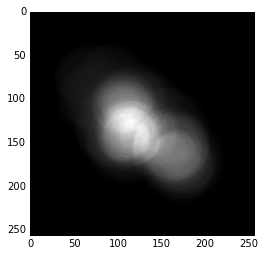

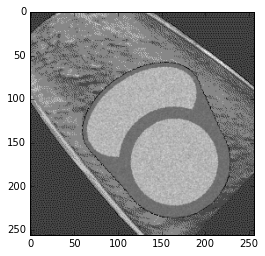

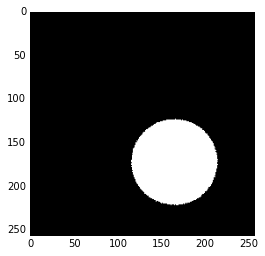

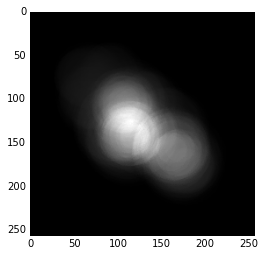

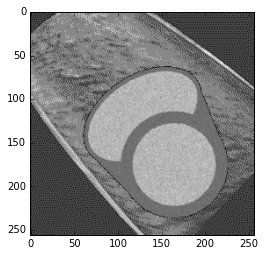

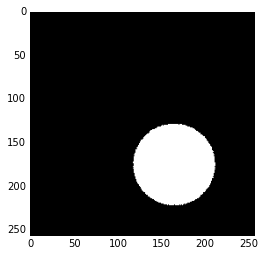

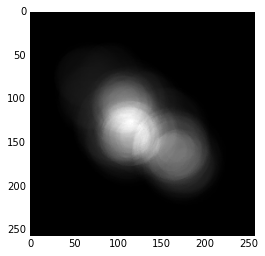

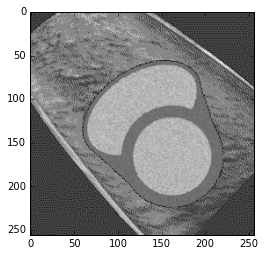

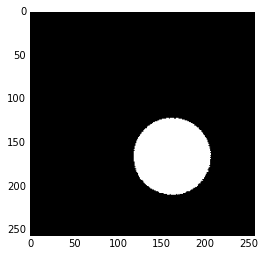

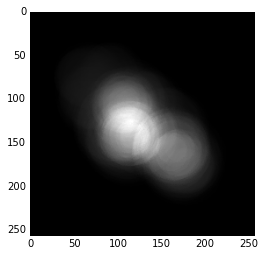

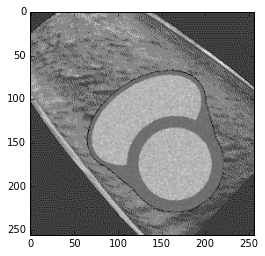

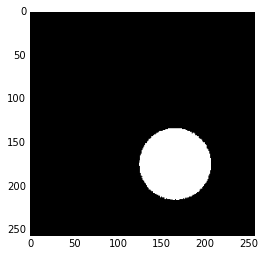

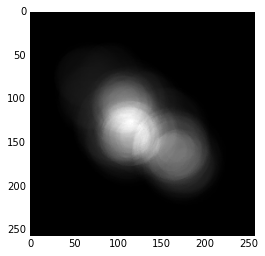

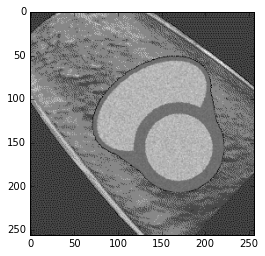

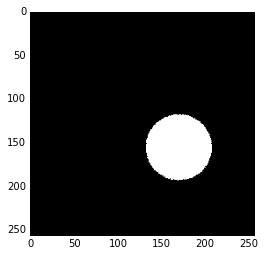

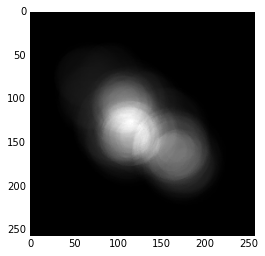

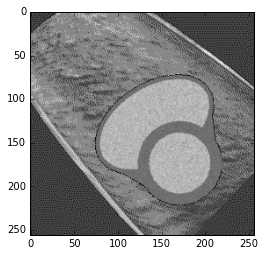

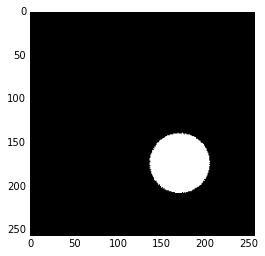

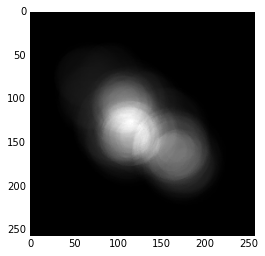

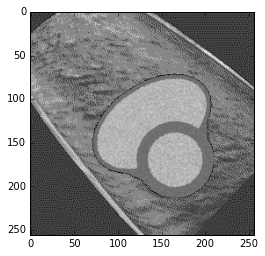

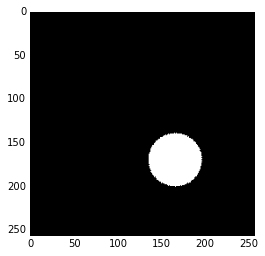

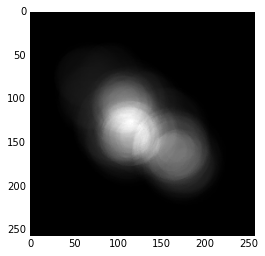

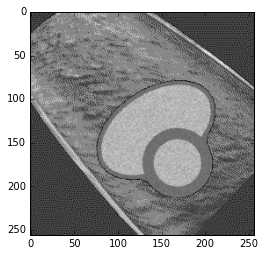

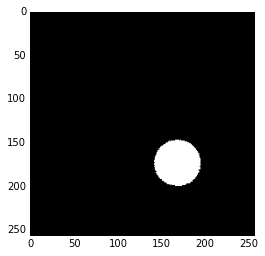

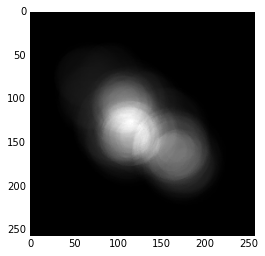

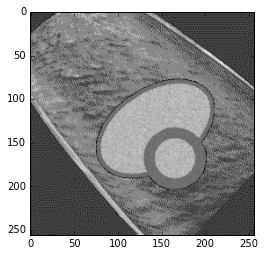

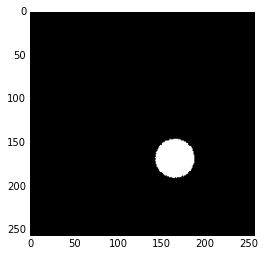

In [27]:
insight = dict(zip(names, outputs[0]))
  
print outputs[1][0].shape
print outputs[2][0].shape

from HeartDeepLearning import my_utils as mu

one = insight['softmax'][:,0]
img = outputs[1][:,0]
label = outputs[2][:,0]

for i in range(30):
    mu.show(one[i])
    mu.show(img[i])
    mu.show(label[i])

In [70]:
print cout.keys()
print
print rout.keys()

['activation7', 'full1', 'full2', 'deconvolution2', 'conv3', 'conv2', 'conv1', 'activation6', 'conv7', 'conv6', 'conv5', 'conv4', 'conv9', 'conv8', 'reshape18', 'reshape17', 'conv10', 'pooling2', 'pooling0', 'pooling1', 'batchnorm8', 'batchnorm9', 'batchnorm4', 'batchnorm5', 'batchnorm6', 'batchnorm7', 'batchnorm0', 'batchnorm1', 'batchnorm2', 'batchnorm3', 'activation8', 'softmax', 'activation3', 'activation2', 'activation1', 'activation0', 'deconvolution1', 'deconvolution0', 'activation5', 'activation4']

['activation12', 'activation7', 'reshape2', 'deconvolution2', 'rnn_slice', 'pred', 'activation14', 'activation13', 'reshape0', 'activation11', 'activation10', 'conv3', 'conv2', 'conv1', 'activation6', 'conv7', 'conv6', 'conv5', 'conv4', 'conv9', 'conv8', 'softmax', '_plus0', 'conv10', 'rnn_i2h', 'pooling2', '_mul0', 'pooling0', 'pooling1', '_plus1', 'rnn_h2h', 'batchnorm8', 'batchnorm9', 'batchnorm4', 'batchnorm5', 'batchnorm6', 'batchnorm7', 'batchnorm0', 'batchnorm1', 'batchnorm2'

In [76]:
import matplotlib.pyplot as plt
def show_layer(n):
    print '_'*30, n
    layer= n
    fig = plt.figure()
    fig.add_subplot(141).imshow(rout[layer][0,0],cmap='gray')
    fig.add_subplot(142).imshow(cout[layer][0,0],cmap='gray')
    fig.add_subplot(143).imshow(gcout[layer][0,0],cmap='gray')
    fig.add_subplot(144).imshow(cimg[0,0],cmap='gray')
    plt.show()
    plt.close()

______________________________ conv1


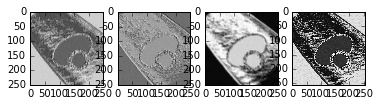

______________________________ conv2


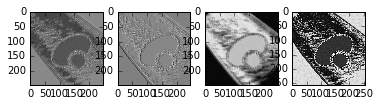

______________________________ conv3


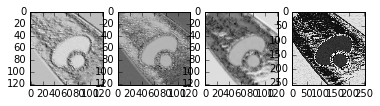

______________________________ conv4


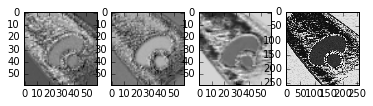

______________________________ conv5


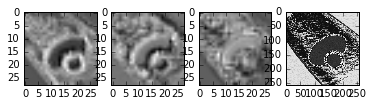

______________________________ conv6


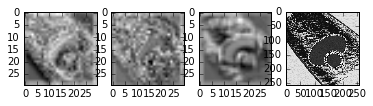

______________________________ conv7


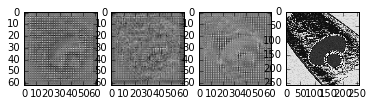

______________________________ conv8


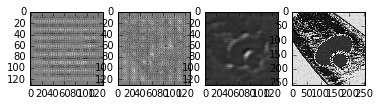

______________________________ conv9


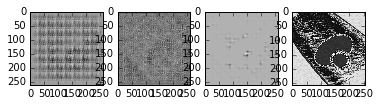

______________________________ conv10


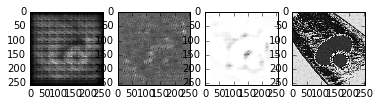

In [77]:
for n in ['conv%d'%i for i in range(1,11)]:
    show_layer(n)

64
______________________________ 0


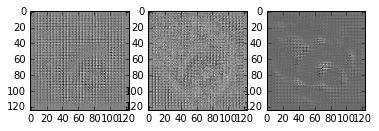

______________________________ 1


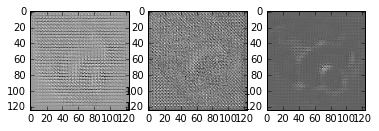

______________________________ 2


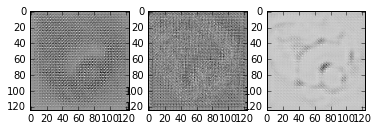

______________________________ 3


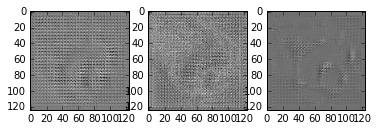

______________________________ 4


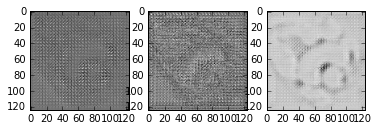

______________________________ 5


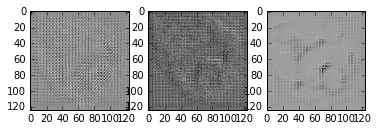

______________________________ 6


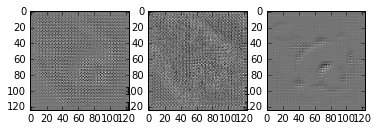

______________________________ 7


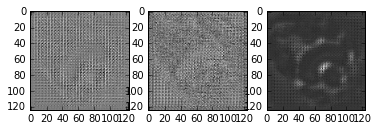

______________________________ 8


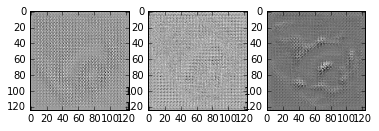

______________________________ 9


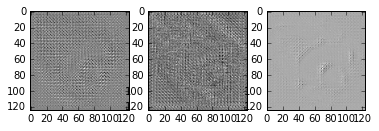

______________________________ 10


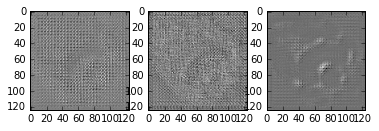

______________________________ 11


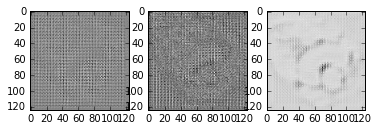

______________________________ 12


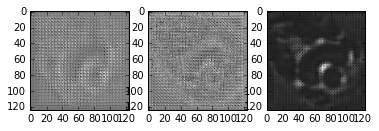

______________________________ 13


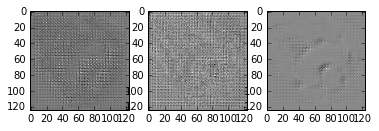

______________________________ 14


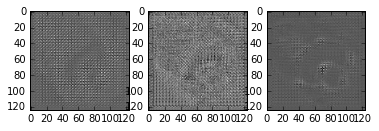

______________________________ 15


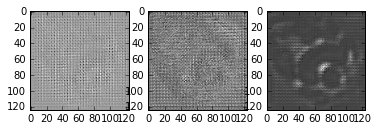

______________________________ 16


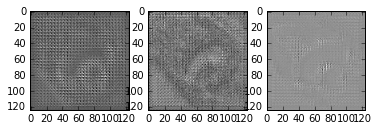

______________________________ 17


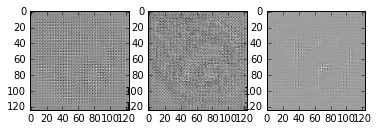

______________________________ 18


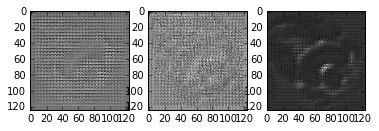

______________________________ 19


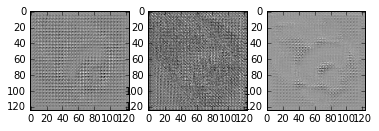

______________________________ 20


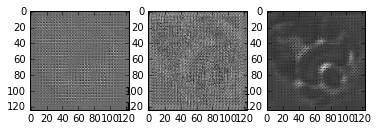

______________________________ 21


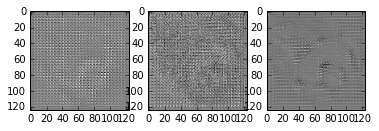

______________________________ 22


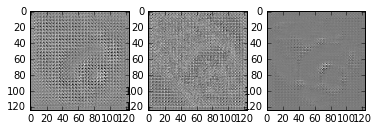

______________________________ 23


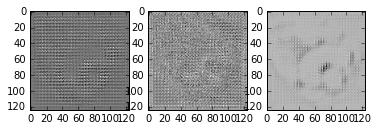

______________________________ 24


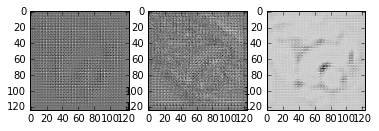

______________________________ 25


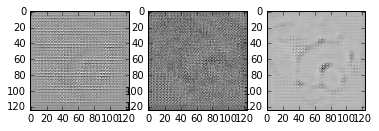

______________________________ 26


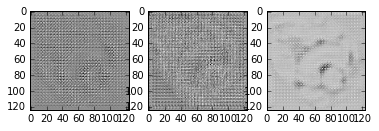

______________________________ 27


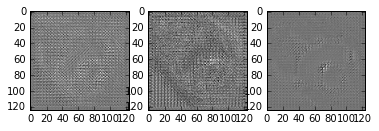

______________________________ 28


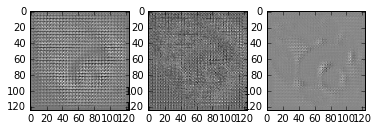

______________________________ 29


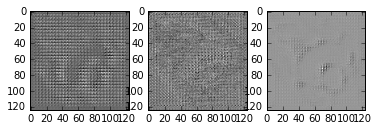

______________________________ 30


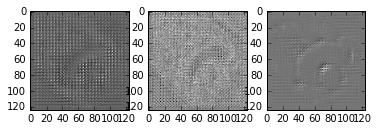

______________________________ 31


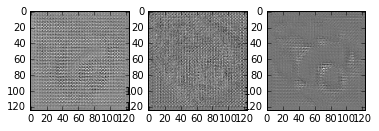

______________________________ 32


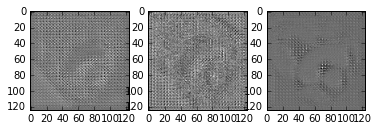

______________________________ 33


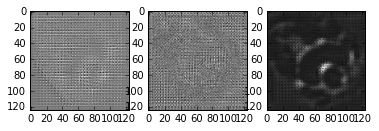

______________________________ 34


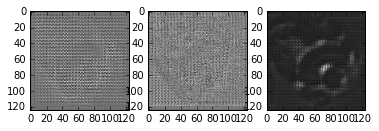

______________________________ 35


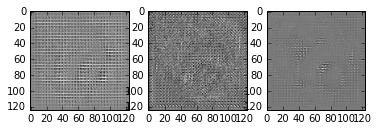

______________________________ 36


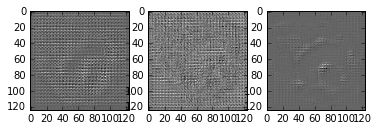

______________________________ 37


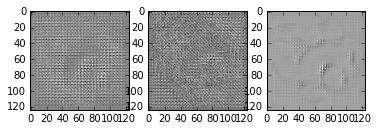

______________________________ 38


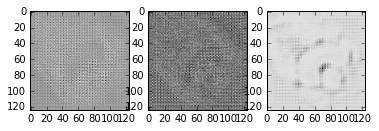

______________________________ 39


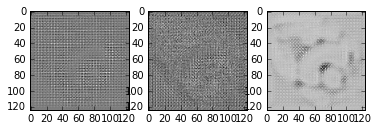

______________________________ 40


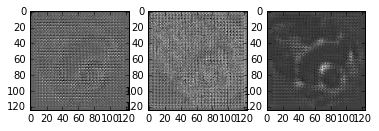

______________________________ 41


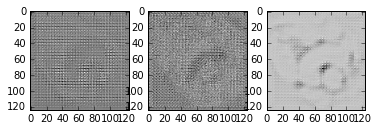

______________________________ 42


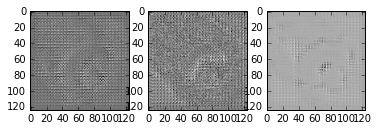

______________________________ 43


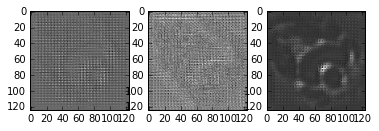

______________________________ 44


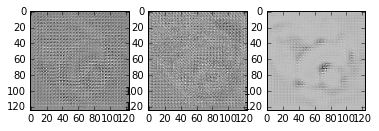

______________________________ 45


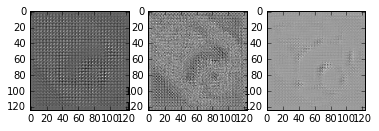

______________________________ 46


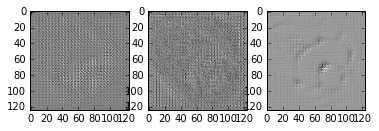

______________________________ 47


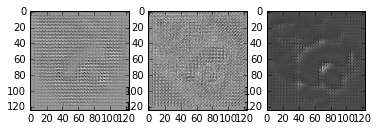

______________________________ 48


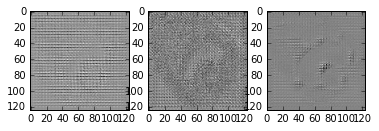

______________________________ 49


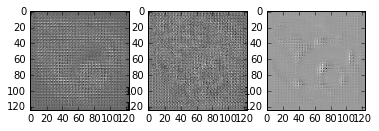

______________________________ 50


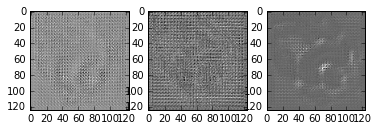

______________________________ 51


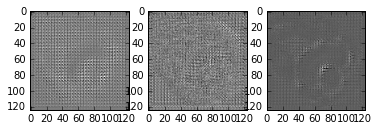

______________________________ 52


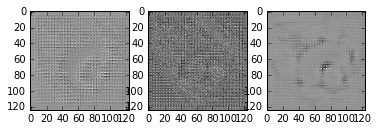

______________________________ 53


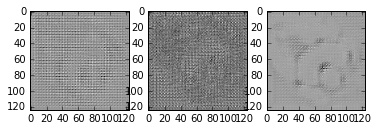

______________________________ 54


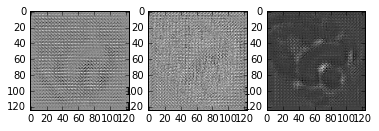

______________________________ 55


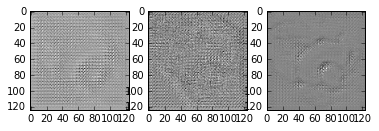

______________________________ 56


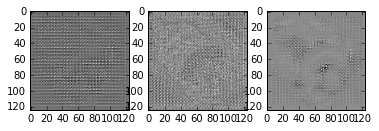

______________________________ 57


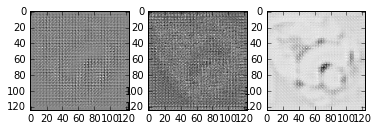

______________________________ 58


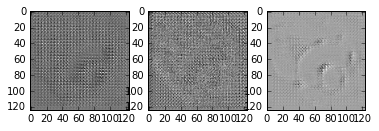

______________________________ 59


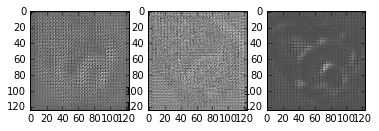

______________________________ 60


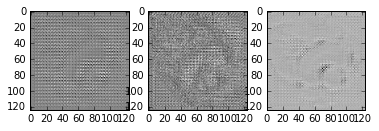

______________________________ 61


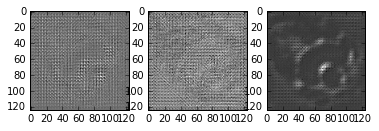

______________________________ 62


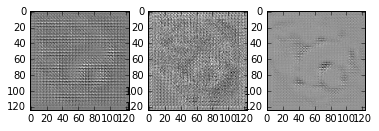

______________________________ 63


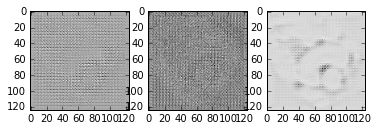

In [84]:
detailed_layer='conv6'
def show_filter(layer):
    H = cout[layer].shape[1]
    print H
    for h in range(H):
        print '_'*30, h
        fig = plt.figure()
        fig.add_subplot(131).imshow(rout[layer][0,h],cmap='gray')
        fig.add_subplot(132).imshow(cout[layer][0,h],cmap='gray')
        fig.add_subplot(133).imshow(gcout[layer][0,h],cmap='gray')
        plt.show()
        plt.close()

show_filter('deconvolution1')

['activation21', 'activation24', 'activation20', 'reshape22', 'activation7', '_mul7', 'deconvolution2', 'rnn_slice', 'pred', 'reshape0', 'conv3', 'conv2', 'conv1', 'activation6', 'conv7', 'conv6', 'conv5', 'conv4', 'conv9', 'conv8', '_plus5', '_plus4', 'conv10', 'rnn_i2h', 'pooling2', 'pooling0', 'pooling1', '_mul6', 'rnn_h2h', 'batchnorm8', 'batchnorm9', 'batchnorm4', 'batchnorm5', 'batchnorm6', 'batchnorm7', 'batchnorm0', 'batchnorm1', 'batchnorm2', 'batchnorm3', 'activation22', 'activation8', '_mul8', 'softmax', 'activation23', 'activation3', 'activation2', 'activation1', 'activation0', 'deconvolution1', 'deconvolution0', 'activation5', 'activation4']
activation1 (30, 16, 248, 248)


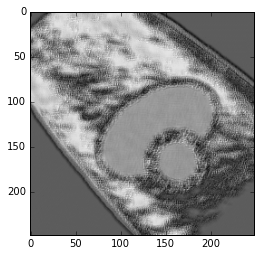

activation2 (30, 32, 122, 122)


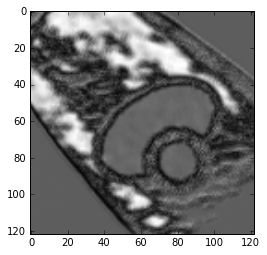

activation3 (30, 64, 59, 59)


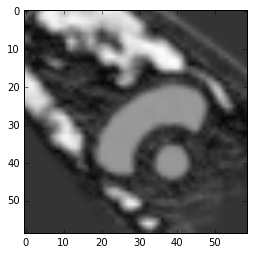

activation4 (30, 64, 28, 28)


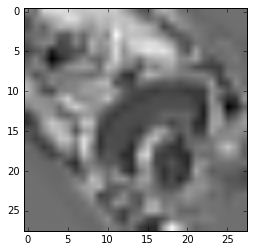

activation5 (30, 64, 30, 30)


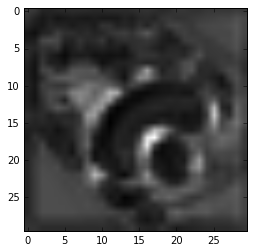

activation6 (30, 64, 62, 62)


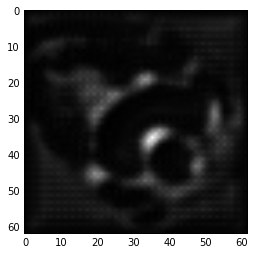

activation7 (30, 64, 130, 130)


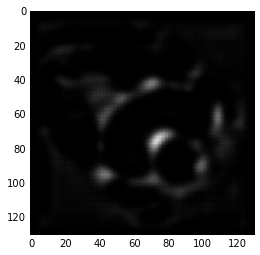

activation8 (30, 16, 262, 262)


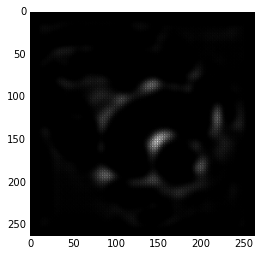

In [95]:
print rout.keys()
for i in range(1,24):
    name = 'activation%d' % i 
    if name in gcout:
        print name, gcout[name].shape
        if len(gcout[name].shape)==4:
            mu.show(gcout[name][0].mean(axis=0))